# **MOBILITY SALES ANALYSIS** 

## **DATA CLEANING**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
## Read the file ##
sales = pd.read_excel(r'C:\Users\lvall\OneDrive\Documentos\JAUME\Cabify\TeVienes_Sales.xlsx')

In [7]:
## Filter the columns of interest ##
sales = sales[['start_at','end_state','currency','price','price_distance','price_duration','distance','duration','cost','cost_distance','cost_duration','driver_score','rider_score']]
sales = sales[sales['currency'] == 'MXN']
sales = sales.drop(columns = 'currency')
sales.head()

,start_at,end_state,price,price_distance,price_duration,distance,duration,cost,cost_distance,cost_duration,driver_score,rider_score
0,2010-01-01 06:26:34.997,rider cancel,0,0,0,0,0,0,0,0,NaN,NaN
1,2010-01-01 06:27:27.809,drop off,6700,2849,2076,6783,720,4903,2279,1661,Excellent,Regular
2,2010-01-01 06:30:08.034,rider cancel,0,0,0,0,0,0,0,0,NaN,NaN
3,2010-01-01 06:34:08.643,not found,0,0,0,0,0,0,0,0,NaN,NaN
4,2010-01-01 06:47:19.950,drop off,7053,2550,2310,6375,840,5162,2040,1848,Excellent,Regular


In [8]:
## Deletes rows where price = 0 and cost is different from zero. This is done to ensure data analysis consistency ##
sales = sales[~((sales['price'] == 0) & (sales['cost'] != 0))]

In [9]:
## Identify rows where price_distance and price_duration are higher than zero but price is equal to 0 ##
sales[(sales['price_distance'] > 0) & (sales['price_duration'] > 0) & (sales['price'] == 0)].head()

,start_at,end_state,price,price_distance,price_duration,distance,duration,cost,cost_distance,cost_duration,driver_score,rider_score
411,2010-01-08 13:55:14.026,no show,0,500,495,1250,180,0,400,396,NaN,Regular
1860,2010-02-02 19:30:07.898,no show,0,144,460,321,120,0,115,368,NaN,Bad
6981,2010-04-04 06:12:48.858,drop off,0,1433,1330,3115,420,0,1146,1064,Bad,Regular
9164,2010-04-28 13:00:00.000,drop off,0,466,920,1035,240,0,373,736,Bad,Regular
11931,2010-05-21 14:26:55.191,no show,0,348,894,968,360,0,278,715,NaN,Regular


In [10]:
## Calculate the average share that price_distance and price_duration represent relative to the price ##
share_distance_duration_price = (sales['price_distance'].mean() + sales['price_duration'].mean()) / sales['price'].mean()

## Estimate the price for those rows in which there is a price_duration and price_distance and price is equal to 0 ##
sales.loc[(sales['price_distance'] > 0) & (sales['price_duration'] > 0) & (sales['price'] == 0), 'price'] = (sales['price_distance'] + sales['price_duration']) / share_distance_duration_price

C:\Users\lvall\AppData\Local\Temp\ipykernel_16388\1602159907.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1300.98341143  789.74269398 3612.68056863 1812.22412889 1623.94110251
  529.54601169 1281.37059618 9288.62930132  431.48193545  851.19618175
  945.33769494 1022.48143491 1291.83076432 8383.8247579   749.20954246
 1967.81912986 2276.39408975 3007.29833798 4665.23498693 3087.05711999
 1701.08484249]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sales.loc[(sales['price_distance'] > 0) & (sales['price_duration'] > 0) & (sales['price'] == 0), 'price'] = (sales['price_distance'] + sales['price_duration']) / share_distance_duration_price


In [11]:
## Deletes rows where price = 0, price_distance = 0 and price_duration > 0. Therefore, it is not possible to calculate total price ##
sales = sales[~((sales['price']== 0) & (sales['price_distance']== 0) & (sales['price_duration']> 0))]

In [12]:
## Calculate the average share that cost_distance and cost_duration represent relative to the cost ##
share_distance_duration_cost = (sales['cost_distance'].mean() + sales['cost_duration'].mean()) / sales['cost'].mean()

## Estimate the cost for those rows in which there is a cost_duration and cost_distance and cost is equal to 0 ##
sales.loc[(sales['cost_distance'] > 0) & (sales['cost_duration'] > 0) & (sales['cost'] == 0), 'price'] = (sales['cost_distance'] + sales['cost_duration']) / share_distance_duration_cost

In [13]:
## Calculate columns 'price_rest' and 'cost_rest' to understand which fraction represent of total price and cost ##
sales['price_rest'] = sales['price'] - sales['price_distance'] - sales['price_duration']
sales['cost_rest'] = sales['cost'] - sales['cost_distance'] - sales['cost_duration']

In [14]:
## Define datetime columns ##
sales['year'] = sales['start_at'].dt.year
sales['month'] = sales['start_at'].dt.month
sales['month_name'] = sales['start_at'].dt.month_name()
sales['weekday'] = sales['start_at'].dt.weekday
sales['weekday_name'] = sales['start_at'].dt.day_name()
sales['hour'] = sales['start_at'].dt.hour
sales['start_date'] = sales['start_at'].dt.date

sales.head()

,start_at,end_state,price,price_distance,price_duration,distance,duration,cost,cost_distance,cost_duration,...,rider_score,price_rest,cost_rest,year,month,month_name,weekday,weekday_name,hour,start_date
0,2010-01-01 06:26:34.997,rider cancel,0.0,0,0,0,0,0,0,0,...,NaN,0.0,0,2010,1,January,4,Friday,6,2010-01-01
1,2010-01-01 06:27:27.809,drop off,6700.0,2849,2076,6783,720,4903,2279,1661,...,Regular,1775.0,963,2010,1,January,4,Friday,6,2010-01-01
2,2010-01-01 06:30:08.034,rider cancel,0.0,0,0,0,0,0,0,0,...,NaN,0.0,0,2010,1,January,4,Friday,6,2010-01-01
3,2010-01-01 06:34:08.643,not found,0.0,0,0,0,0,0,0,0,...,NaN,0.0,0,2010,1,January,4,Friday,6,2010-01-01
4,2010-01-01 06:47:19.950,drop off,7053.0,2550,2310,6375,840,5162,2040,1848,...,Regular,2193.0,1274,2010,1,January,4,Friday,6,2010-01-01


In [15]:
## Define profit columns ##
sales['profit'] = sales['price'] - sales['cost']
sales['profit_distance'] = sales['price_distance'] - sales['cost_distance']
sales['profit_duration'] = sales['price_duration'] - sales['cost_duration']
sales['profit_rest'] = sales['price_rest'] - sales['cost_rest']

## Define unit profit columns ##
sales['unit_profit'] = (sales['price'] - sales['cost']) / sales['price']
sales['unit_profit_distance'] = (sales['price_distance'] - sales['cost_distance']) / sales['price']
sales['unit_profit_duration'] = (sales['price_duration'] - sales['cost_duration']) / sales['price']
sales['unit_profit_rest'] = (sales['price_rest'] - sales['cost_rest']) / sales['price']

In [16]:
## Delete 2011 observation for visualization purposes (only 43 observations in 2011) ##
sales = sales[sales['year'] == 2010]
sales.head()

,start_at,end_state,price,price_distance,price_duration,distance,duration,cost,cost_distance,cost_duration,...,hour,start_date,profit,profit_distance,profit_duration,profit_rest,unit_profit,unit_profit_distance,unit_profit_duration,unit_profit_rest
0,2010-01-01 06:26:34.997,rider cancel,0.0,0,0,0,0,0,0,0,...,6,2010-01-01,0.0,0,0,0.0,NaN,NaN,NaN,NaN
1,2010-01-01 06:27:27.809,drop off,6700.0,2849,2076,6783,720,4903,2279,1661,...,6,2010-01-01,1797.0,570,415,812.0,0.268209,0.085075,0.061940,0.121194
2,2010-01-01 06:30:08.034,rider cancel,0.0,0,0,0,0,0,0,0,...,6,2010-01-01,0.0,0,0,0.0,NaN,NaN,NaN,NaN
3,2010-01-01 06:34:08.643,not found,0.0,0,0,0,0,0,0,0,...,6,2010-01-01,0.0,0,0,0.0,NaN,NaN,NaN,NaN
4,2010-01-01 06:47:19.950,drop off,7053.0,2550,2310,6375,840,5162,2040,1848,...,6,2010-01-01,1891.0,510,462,919.0,0.268113,0.072310,0.065504,0.130299


## **VISUALIZATION**

In [18]:
## Figure 1. Total profits by components ##

profit_long = sales.melt(id_vars='month', value_vars=['profit', 'profit_distance', 'profit_duration', 'profit_rest'], 
                         var_name='component', value_name='value')

sum_profit_long = profit_long.groupby(['month','component'])['value'].sum().reset_index()

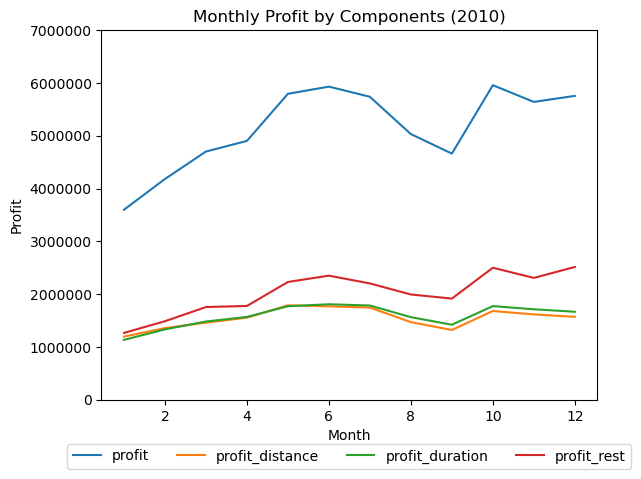

In [19]:
sns.lineplot(data=sum_profit_long, x='month', y='value', hue='component')

plt.title("Monthly Profit by Components (2010)")
plt.xlabel("Month")
plt.ylabel("Profit")
plt.ticklabel_format(style = 'plain')
plt.ylim(0, 7000000)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)

plt.show()

In [20]:
## Figure 2. Number of journeys (price > 0) ##

journeys = sales[sales['price'] > 0]
number_journeys = journeys.groupby('month')['end_state'].count().reset_index()

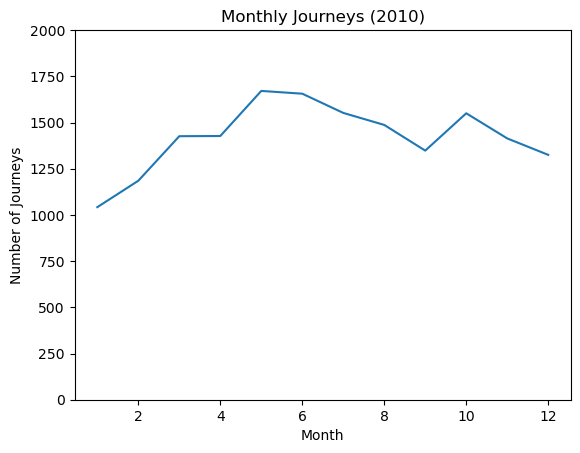

In [21]:
sns.lineplot(data=number_journeys, x='month', y='end_state')

plt.title("Monthly Journeys (2010)")
plt.xlabel("Month")
plt.ylabel("Number of Journeys")
plt.ticklabel_format(style = 'plain')
plt.ylim(0, 2000)

plt.show()

In [22]:
## Figure 3. Average profit, price and unit_profit ##

average_profit = sales.groupby('month')[['profit','price','unit_profit']].mean()

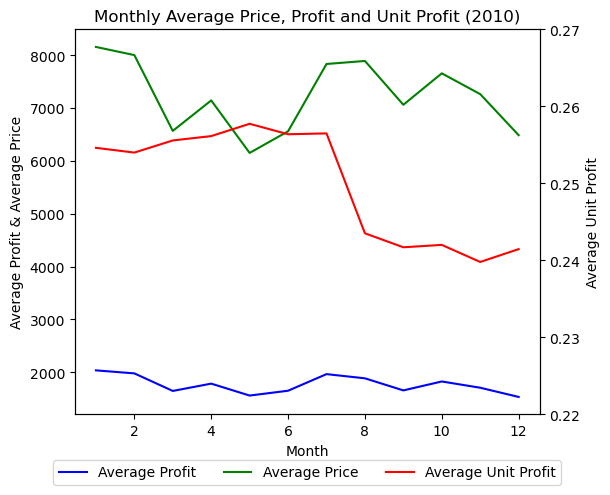

In [23]:
fig, ax1 = plt.subplots(figsize=(6, 5))

sns.lineplot(data=average_profit, x='month', y='profit', ax=ax1, label="Average Profit", color="blue")
sns.lineplot(data=average_profit, x='month', y='price', ax=ax1, label="Average Price", color="green")
ax1.set_ylabel("Average Profit & Average Price", color="black")
ax1.tick_params(axis='y', labelcolor="black")

ax2 = ax1.twinx()

sns.lineplot(data=average_profit, x='month', y='unit_profit', ax=ax2, label="Average Unit Profit", color="red")
ax2.set_ylabel("Average Unit Profit", color="black")
ax2.tick_params(axis='y', labelcolor="black")
ax1.set_xlabel("Month")
ax1.get_legend().remove()
ax2.get_legend().remove()

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=4)

plt.ylim(0.22, 0.27)

plt.title("Monthly Average Price, Profit and Unit Profit (2010)")
plt.show()

In [152]:
## Figure 4. Number of drop-offs and unsuccessful drop-offs journeys by hours ##

end_state_count = sales.groupby(['hour', 'end_state']).size().reset_index(name='count')
drop_offs = end_state_count[end_state_count['end_state']=='drop off']
non_drop_offs = end_state_count[~end_state_count['end_state'].isin(['drop off'])].groupby('hour')['count'].sum().reset_index()
non_drop_offs['end_state'] = 'no drop off'
end_state_sum = pd.concat([drop_offs, non_drop_offs]).sort_values(by=['hour', 'end_state'])
end_state_sum = end_state_sum.set_index('hour')

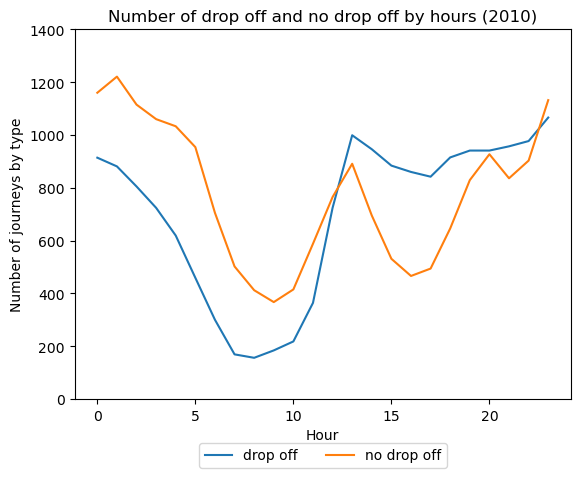

In [154]:
sns.lineplot(data=end_state_sum, x='hour', y='count', hue='end_state')

plt.title("Number of drop off and no drop off by hours (2010)")
plt.xlabel("Hour")
plt.ylabel("Number of journeys by type")
plt.ticklabel_format(style = 'plain')
plt.ylim(0, 1400)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)

plt.show()

In [202]:
## Figure 5. Monthly share of different types of no drop offs ##

monthly_end_state = sales.groupby(['month', 'end_state']).size().reset_index(name='count')
type_no_dropoff = monthly_end_state[~monthly_end_state['end_state'].isin(['drop off'])]
type_no_dropoff.loc[:,'monthly_count'] = type_no_dropoff.groupby('month')['count'].transform('sum')
type_no_dropoff['share_no_dropoff'] = type_no_dropoff['count'] / type_no_dropoff['monthly_count'] * 100

C:\Users\lvall\AppData\Local\Temp\ipykernel_16388\3571450545.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_no_dropoff.loc[:,'monthly_count'] = type_no_dropoff.groupby('month')['count'].transform('sum')
C:\Users\lvall\AppData\Local\Temp\ipykernel_16388\3571450545.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type_no_dropoff['share_no_dropoff'] = type_no_dropoff['count'] / type_no_dropoff['monthly_count'] * 100


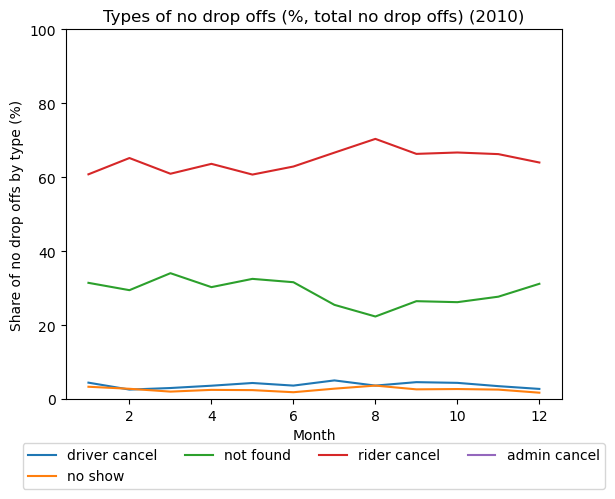

In [204]:
sns.lineplot(data=type_no_dropoff, x='month', y='share_no_dropoff', hue='end_state')

plt.title("Types of no drop offs (%, total no drop offs) (2010)")
plt.xlabel("Month")
plt.ylabel("Share of no drop offs by type (%)")
plt.ticklabel_format(style = 'plain')
plt.ylim(0, 100)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)

plt.show()

<Axes: xlabel='duration', ylabel='Count'>

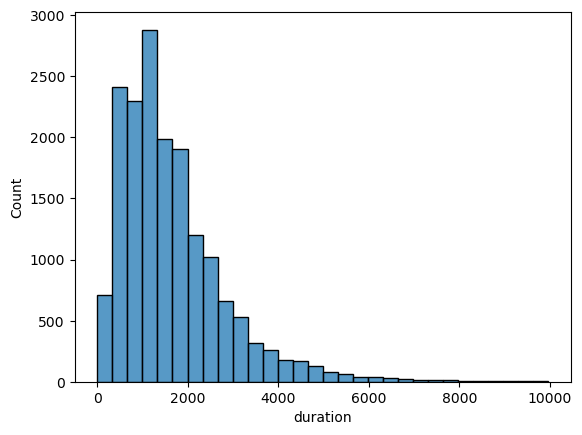

In [276]:
duration = sales[(sales['duration'] != 0) & (sales['duration'] < 10000)]
duration_filtered = duration['duration']
sns.histplot(duration_filtered, bins=30, kde=False)

<Axes: xlabel='distance', ylabel='Count'>

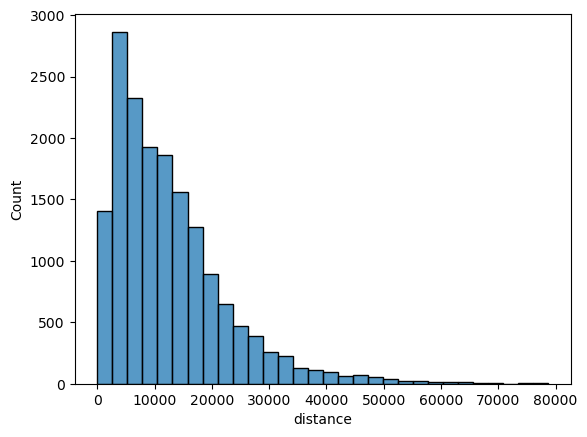

In [282]:
distance = sales[(sales['distance'] != 0) & (sales['distance'] < 80000)]
distance_filtered = distance['distance']
sns.histplot(distance_filtered, bins=30, kde=False)

In [322]:
## Define three categories for distance and duration (short, medium and long journeys) ## 

def distance_type (distance):
    if distance == 0:
        return 'No drop off'
    elif distance <= 8000:
        return 'Short'
    elif distance <= 16000:
        return 'Medium'
    else:
        return 'Long'

sales['distance_type'] = sales['distance'].apply(distance_type)

def duration_type (duration):
    if duration == 0:
        return 'No drop off'
    elif duration <= 1000:
        return 'Short'
    elif duration <= 2000:
        return 'Medium'
    else:
        return 'Long'

sales['duration_type'] = sales['duration'].apply(duration_type)

Text(0, 0.5, 'Unit profit duration')

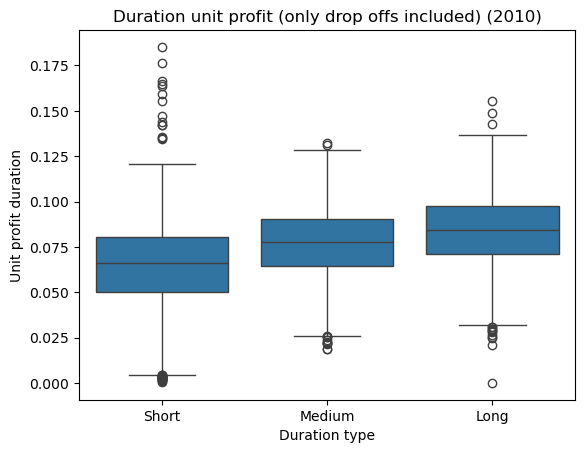

In [338]:
## Figure 6. Distribution of duration unit profit by duration type ##

sales['duration_type'].value_counts()
duration_type = sales[(~sales['duration_type'].isin(['No drop off'])) & (sales['unit_profit_duration'] < 0.3)]

sns.boxplot(x='duration_type', y='unit_profit_duration', data=duration_type)

plt.title("Duration unit profit (only drop offs included) (2010)")
plt.xlabel("Duration type")
plt.ylabel("Unit profit duration")

Text(0, 0.5, 'Unit profit distance')

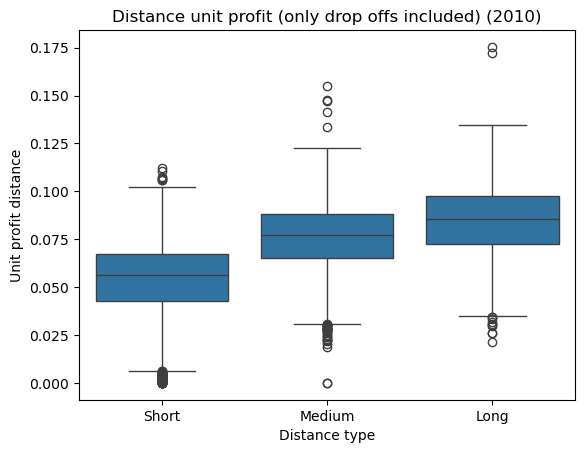

In [342]:
## Figure 7. Distribution of distance unit profit by distance type ##

sales['distance_type'].value_counts()
distance_type = sales[(~sales['distance_type'].isin(['No drop off'])) & (sales['unit_profit_distance'] < 0.3)]

sns.boxplot(x='distance_type', y='unit_profit_distance', data=distance_type)

plt.title("Distance unit profit (only drop offs included) (2010)")
plt.xlabel("Distance type")
plt.ylabel("Unit profit distance")

## **INSIGHTS AND BUSINESS RECOMMENDATIONS**

**CONCEPTUAL FRAMEWORK**

The starting point of my thought process starts with the following identity:

Profit=nº journeys*price* (price-cost)/price

Therefore, profit depends on the number of journeys (with a positive price), multiplied by the journey price and the “unit profit.” The unit profit represents the margin per euro (or any other currency) sold. By definition, it ranges between 0 (TeVienes receives no profit from the journey) and 1 (TeVienes captures the entire transaction value).
TeVienes’ business model heavily relies on the number of successful journeys and the margin per journey. This analysis aims to provide key insights into these two factors.

To illustrate the previous equation, Figures 1, 2 and 3 provide an empirical relationship between the variables. Understanding the root causes of profit variations is essential to provide sound business recommendations.
In short, Figure 1 provides the monthly total profit amount (broken down by distance, duration and the residual factors) and Figure 2 shows the evolution of journeys where the price >0 (for all “end_state” categories). Finally, Figure 3 captures the monthly average of price, average profit and average unit profit. 

The main results are:

Profits (in Mexican pesos) went up during the first half of the year, led by a sharp increase in journeys (the average price and unit price remained fairly constant). However, in the second half of the year, journeys declined, despite a rise in average price. Meanwhile, unit profit decreased, meaning TeVienes captured a lower share of each peso paid by riders.

What is the key takeaway from this analysis for TeVienes business model?
An increase in the average price is negatively associated with the number of journeys. This finding suggests that there is a trade-off between maximizing journeys and increasing the revenue per journey. To optimize profits in both the short and long term, TeVienes must find the right balance between these two factors.

**BUSINESS RECOMMENDATIONS**

Based on the previous analysis, I will provide two business recommendations. The first one will focus on how to improve the number of journeys and the second one on the pricing strategy (average unit profit).

•	Business recommendation 1

Figure 4 suggests that unsuccessful journeys (i.e., those without a drop-off, defined as the difference between total “end_state” observations and actual drop-offs) require careful attention.
One key insight is that demand follows two main peaks: from 8:00 PM to 3:00 AM and from 12:00 PM to 3:00 PM. Interestingly, while demand levels are relatively similar between these two periods, the number of drop-offs is significantly lower during the second peak. This suggests that TeVienes' competitors may be better meeting customer needs during late-night hours. Additionally, Figure 5 indicates that the primary reason for no drop-offs is rider cancellations (between 60% – 70% of total no drop-offs in 2010).

*To minimize rider cancellations between 8:00 PM and 3:00 AM, TeVienes should implement a rider retention strategy. One possible solution is a points-based loyalty program, where riders earn points for completed journeys and receive a discount after reaching a certain threshold.*

•	Business recommendation 2

Figures 6 and provide the empirical foundation for my second recommendation. Figures 6 and 7 show the distribution of unit profit by journey duration and distance, categorizing trips into three groups: short, medium, and long. To achieve this, the dataset was divided into three distinct ranges for duration and distance. Figures 7 and 8 indicate that unit profit increases gradually as journey duration and distance grow. This strategy seems a bit counterintuitive. The main reason is that I would expect the pricing strategy to reward clients and drivers who engage in long journeys (and vice versa), since shorter ones may be less profitable on average (the app will need to generate more matches between drivers and riders, with a higher risk of unfulfilled rides (no drop-offs). 

*Although this is not strictly a business recommendation, I suggest scheduling a meeting with the pricing team to better understand why short journeys tend to exhibit lower unit profits—and adjust the pricing strategy if necessary.*

